# The Sinking of RMS Titanic


   <img src=Stöwer_Titanic.jpg >
   
There is no doubt the sinking of Titanic is engraved in our mind as one of the worst tragedies in the 20th century. The pictures of men, women and children with mixed feelings of fear, hope, love, anger, sadness and gratefulness. It is at the darkest moments that the best and worst of people meet each other.

Although titanic might not be the worst shipwrek of all time in terms of fatalities* (the 1987 loss of the ferry Doña Paz, with an estimated 4,386 dead is the largest non-military loss recorded)*, yet no doubt it is the most famous. There is something about this unlucky ship the made us turn her into a legend. It might be that she symbolizes the limits of technology, or the arrogance of the human race.

Titanic was planned to be the biggest, fastest, most luxorios pessenger liner ever built at her time, and she was indeed a sign of her times, with its first class pessengers; silent film stars, alongside millionairs
Second class pessengers were school teachers, small businessmen, and the like. Buried out of sight near the bottom of the ship, the third-class pessengers include immigrants from all over europe, in search of better life in the new world

by 11th of April the titanic was on her way accross the atlantic. Hearing report of ice from other liners, on this busy route, Captain Smith took a new more southerly course, and called for full speed ahead. On 14th of April, Titanic's operators received more reports of iceburgs along the Titanic path, but they were busy sending telegraph's on behalf of pessengers!

At 11:40 PM the lookouts sounded the alarms, and called the bridge.. iceburg right ahead!
The titanic struck the iceburg in less than 40 seconds, tearing the ship. By midnight, the forward third-class section was beginning to flood.

Captain Smith realized the titanic was in grave danger, he ordered the lifeboats uncovered. There were only 20 lifeboats on board, this was actually more than the law required by this time, but too few to carry all pessengers. The capacity of the lifeboats was enough to carry 520 pessengers out of 2229 (less than 25%). No one could imagine that a gigantic liner like the Titanic might sink before another ship came to the rescue!. The nearest ship that replied to the Titanic's SOS was 4 hours away.

Because of the shortage of lifeboats, Captain smith ordered women and children to board first. It is said the crew managed the evacuation as best they could in the confusion, but many boats were launched half full.

Third clas pessengers had to find their way through a maze of corridors and staircases to reach the boat deck!

Just after 2:00 AM the final lifeboat was lowered. the pessengers still on board could see that the game was up.

Captain smith relieved his men of their duties with the words "every man for himself" then returned to the bridge

At around 2:20 AM, he went down with the ship

At the end, the crew of the Titanic are said to have handled the situation the best they could in middle of confusion, but people should be trained to deal with such disasters, and we can never learn from our mistakes without looking into them.
- What should we learn from this tragedy? And how can we manage such situations in best possible way?
- Was the "women and children first" policy effective accross all classes?
- Was class, or fare a factor in survival after all?


We will try to answer the **above questions** through the [Titanic Data](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv), containing demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the [Kaggle website](https://www.kaggle.com/c/titanic/data), where the data was obtained.

In [21]:
# source of this code: https://stackoverflow.com/users/4244561/harshil
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline


## The source data
Data was obtained from Kaggle website, it contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. below sample:

In [3]:
# Data Import
# Importing data, and displaying first few lines

titanic_data=pd.read_csv("titanic-data.csv")
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### Some notes about the data:

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.


***Let's start*** by showing discriptive statistics for the data.

In [4]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

There survival rate for this sample of pessenger was in the range of 38%. The mean age of pessengers was around 30 years. however there seem to be some missing record for age. We will exclude pessenger with no age record, whenever the analysis envolves age.

We will also do some adjustment for the data to facilitate the calculations. Now let's repeat the statistics after data adjustment

In [5]:
# Data wrangling
# we need to parse the pessenger ID to be a string rather than an intiger, 
# we don't need to make any arithmatic operations on it
# we would also create a numerical representation of gender in order to have some descriptive statistics. 
titanic_data['Passenger_Id']=titanic_data['PassengerId'].apply(str)
del titanic_data['PassengerId']
titanic_data['Sex_numeric']=(titanic_data['Sex']=='female').apply(int)

In [6]:
#creating a new dataFrame with only records containing age of pessnger
titanic_data_full_Age=titanic_data[titanic_data['Age'].isnull()==False]

In [7]:
titanic_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208   
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

       Sex_numeric  
count   891.000000  
mean      0.352413  
std       0.477990  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

It seems, for this sample, there were more males than females. The column "Sex_numeric" equals 0 for males, and 1 for females. Since the mean is 0.35, it means that around 35% of the pessengers were females

## Let's Explore

Now let's try to have more specific **questions**

- Were women and children more likely to survive the titanic?
- Was cabin class a factor in survival? for men and women?
- were first class men given higher chance of survival compared to 3rd class women and children?

the later question might actually be a bit misleading. We know that due to the location of the third class, it was difficult for the third class pessengers to reach the lifeboats. so even if more first class men were embarked in the lifeboats, it doesn't mean the crew did not apply the "women and children first" policy.

we will be investigating if gender, age, cabin class, or pessenger fare were factors in the pessenger survival rate (% of pessengers survived). 

survival rate can be defined as sum of surviving perssengers as a percentage of total pessengers for each category (gender, age, class, ..)

Let's plot some charts to have a general idea. Let's first have a look at the survival rates per gender.

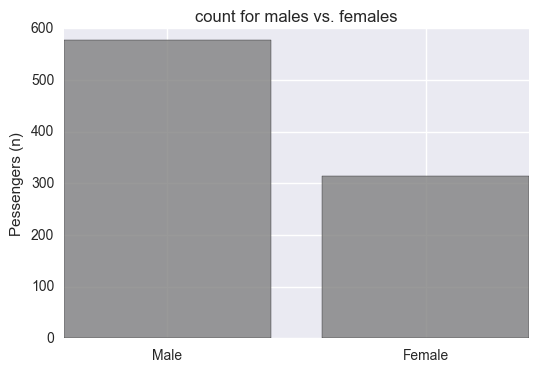

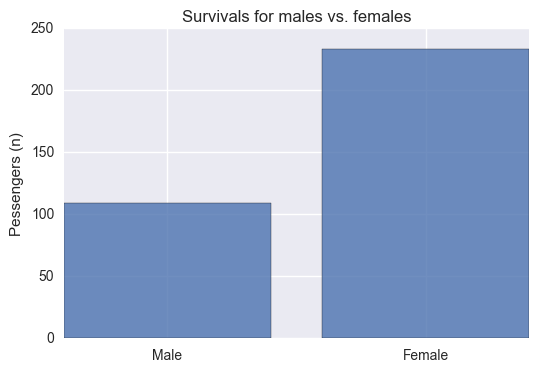

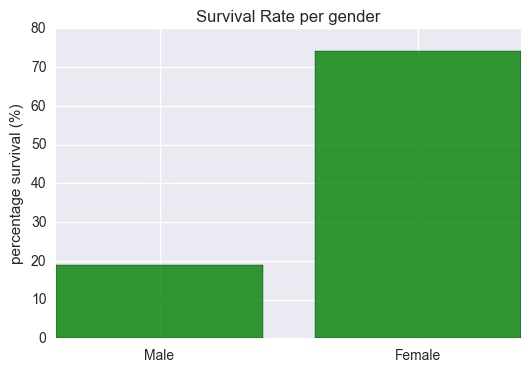

In [8]:
#bar plots for males count vs females
xval=titanic_data.groupby('Sex_numeric',as_index=False).sum()['Sex_numeric']
yval=titanic_data.groupby('Sex_numeric',as_index=False).count()['Survived']
lables=["Male","Female"]
plt.bar(xval-0.4, yval, alpha=0.8, color='grey')
plt.xticks(xval, lables)
plt.title("count for males vs. females")
plt.ylabel("Pessengers (n)")
plt.show()

#bar plots for males survived vs females
xval=titanic_data.groupby('Sex_numeric',as_index=False).sum()['Sex_numeric']
yval=titanic_data.groupby('Sex_numeric',as_index=False).sum()['Survived']
lables=["Male","Female"]
plt.bar(xval-0.4, yval, alpha=0.8)
plt.xticks(xval, lables)
plt.title("Survivals for males vs. females")
plt.ylabel("Pessengers (n)")
plt.show()

#bar plots for females survival percentage vs males
xval=titanic_data.groupby('Sex_numeric',as_index=False).sum()['Sex_numeric']
yval=100*titanic_data.groupby('Sex_numeric',as_index=False).sum()['Survived']/titanic_data.groupby('Sex_numeric',as_index=False).count()['Survived']
lables=["Male","Female"]
plt.bar(xval-0.4, yval, alpha=0.8, color='green')
plt.xticks(xval, lables)
plt.title("Survival Rate per gender")
plt.ylabel("percentage survival (%)")
plt.show()


**it seems** that the females were indeed given significantly higher survival chance than males. Now let's have a look at the survival rates over age distribution

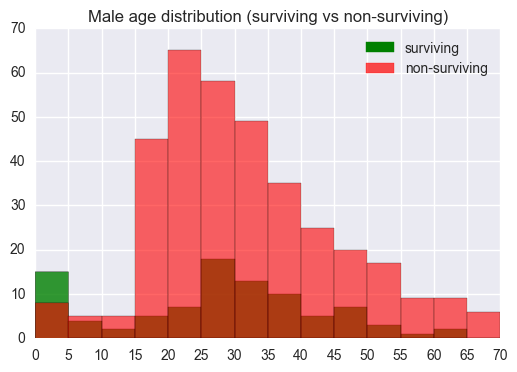

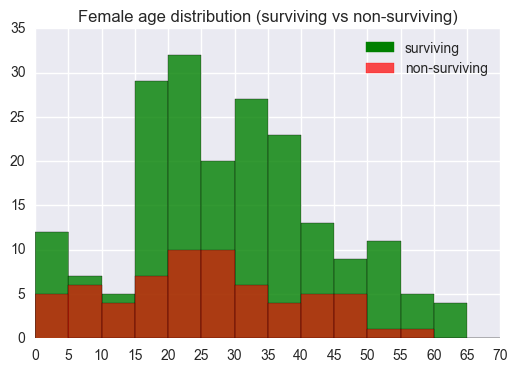

In [9]:
# Survival vs age
# Let's represent it by Histogram for males and females separately.. we will start by males
# let's also normalize it by the count of males for each bins
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color='green'),Rectangle((0,0),1,1,color='red', alpha=0.7)]
legend_labels=['surviving','non-surviving']
bin_values = [n*5 for n in range(15)]

#male distribution
surviving_males_ages=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==0) & (titanic_data_full_Age['Survived']==1)]['Age']
non_surviving_males_ages=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==0) & (titanic_data_full_Age['Survived']==0)]['Age']
plt.hist(surviving_males_ages, alpha=0.8,color='green',bins=bin_values)
plt.hist(non_surviving_males_ages, alpha=0.6, color='red',bins=bin_values)
plt.xticks(bin_values)
plt.title("Male age distribution (surviving vs non-surviving)")
plt.legend(handles, legend_labels,loc='upper right')
plt.show()

#female distribution
surviving_female_ages=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==1) & (titanic_data_full_Age['Survived']==1)]['Age']
non_surviving_female_ages=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==1) &(titanic_data_full_Age['Survived']==0)]['Age']
plt.hist(surviving_female_ages, alpha=0.8,color='green',bins=bin_values)
plt.hist(non_surviving_female_ages, alpha=0.6, color='red',bins=bin_values)
plt.xticks(bin_values)
plt.legend(handles, legend_labels,loc='upper right')
plt.title("Female age distribution (surviving vs non-surviving)")
plt.show()

**It seems** age was important factor in survival. Especially for men, younger ages seem to be more likely to survive than older ages Women survival rates are much higher than men. It also seems as seen in histograms that, especially for males, the age seems to be an important variable, which affected survival rate.. younger children seem to have higher survival rate.

So far it seems the crew followed the "women and children first" policy, but was it followed for all classes?

Let's first have a look at survival rates per class:

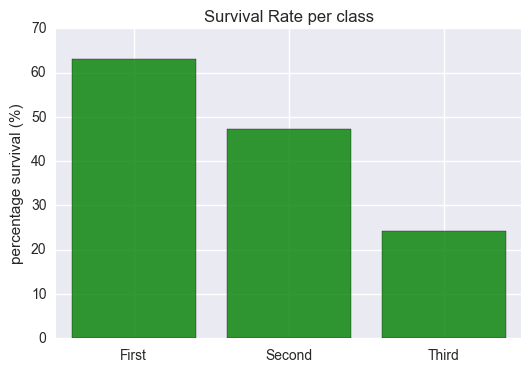

In [10]:
#Let's see the survival counts and percentages per class
"""# overall count
xval=titanic_data.groupby('Pclass',as_index=False).sum()['Pclass']
yval=titanic_data.groupby('Pclass',as_index=False).count()['Survived']
plt.bar(xval-0.4, yval, alpha=0.8, color='grey')
plt.xticks(xval, lables)
plt.title("Count of pessenger per class")
plt.ylabel("Pessengers (n)")
plt.show()

# survival counts
xval=titanic_data.groupby('Pclass',as_index=False).sum()['Pclass']
yval=titanic_data.groupby('Pclass',as_index=False).sum()['Survived']
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='blue')
plt.xticks(xval, lables)
plt.title("Survivals per class")
plt.ylabel("Pessengers (n)")
plt.show()"""

# by survival percentage
xval=titanic_data.groupby('Pclass',as_index=False).sum()['Pclass']
yval=100*titanic_data.groupby('Pclass',as_index=False).sum()['Survived']/titanic_data.groupby('Pclass',as_index=False).count()['Survived']
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='green')
plt.xticks(xval, lables)
plt.title("Survival Rate per class")
plt.ylabel("percentage survival (%)")
plt.show()

We know that due to the location of the third class, it was difficult for the third class pessengers to reach the lifeboats,  that's why the survival rates were less for all classes.. however for second class survival percentages to be lower than first class, this needs a deeper look. 

Let's have a look at the last chart for women and men separately:

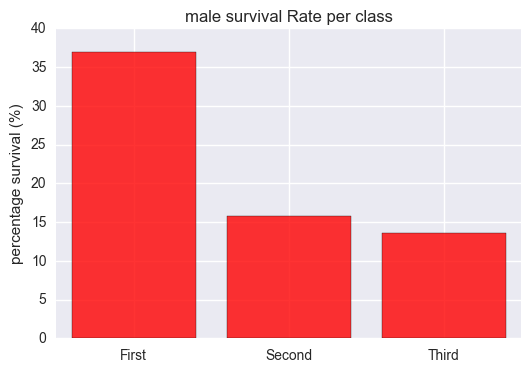

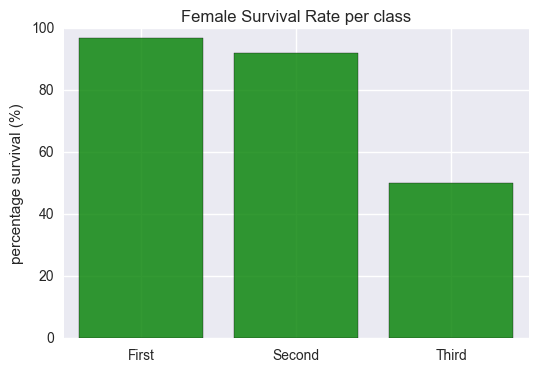

In [11]:
titanic_by_class_gender_sum=titanic_data.groupby(['Pclass','Sex_numeric'],as_index=False).sum()
titanic_by_class_gender_count=titanic_data.groupby(['Pclass','Sex_numeric'],as_index=False).count()

#male survival rate by class
xval=titanic_by_class_gender_count[titanic_by_class_gender_count['Sex_numeric']==0]['Pclass']
yval=100*titanic_by_class_gender_sum[titanic_by_class_gender_sum['Sex_numeric']==0]['Survived']\
/titanic_by_class_gender_count[titanic_by_class_gender_count['Sex_numeric']==0]['Survived']
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='red')
plt.xticks(xval, lables)
plt.title("male survival Rate per class")
plt.ylabel("percentage survival (%)")
plt.show()

#female survival rate by class
xval=titanic_by_class_gender_count[titanic_by_class_gender_count['Sex_numeric']==1]['Pclass']
yval=100*titanic_by_class_gender_sum[titanic_by_class_gender_sum['Sex_numeric']==1]['Survived']\
/titanic_by_class_gender_count[titanic_by_class_gender_count['Sex_numeric']==1]['Survived']
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='green')
plt.xticks(xval, lables)
plt.title("Female Survival Rate per class")
plt.ylabel("percentage survival (%)")
plt.show()


**It seems** that the survival rates for women wer quite high for females of both first and second class, while third class femal survival rate was below 50%,, this might be due to third class location as mentioned before. The data now makes more sense.

Still we can see that first class male pessengers were given much higher chance for survival compared to males from second and third classess.. this leaves a question mark on how the crew handled the situation, after embarking as much women as they could.

It could be that among first class pessengers there were more male kids / baby boys than second and third class, so let's have a deeper investigation.

For this we will need to identify women and children category. We will consider any one of 12 or below to be in the children category. Why 12? because In 1901, the permissible child labour age was raised to 12 [[source: wikipedia](https://en.wikipedia.org/wiki/History_of_childhood#Children.27s_rights_under_the_law)], so this could be a socially accepted definition for childhood at this time. Let's **assume** the crew considered any male below 12 years to be a child.

We will adjust the data (adding isWomanOrChild, and identifier for women and children), and plot the same above charts, but now putting children into consideration

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
#We will create column **isWomanOrChild** which is a boolean giving true if sex = female or Age below  12
titanic_data_full_Age['isWomanOrChild']=(titanic_data_full_Age['Sex_numeric']==1)|(titanic_data_full_Age['Age']<=12)

In [14]:
titanic_data_full_Age.head(3)

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   

  Passenger_Id  Sex_numeric isWomanOrChild  
0            1            0          False  
1            2            1           True  
2            3            1           True

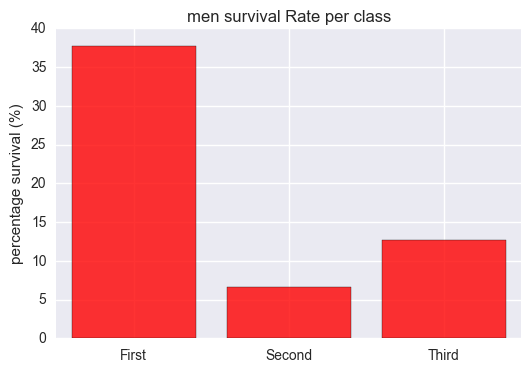

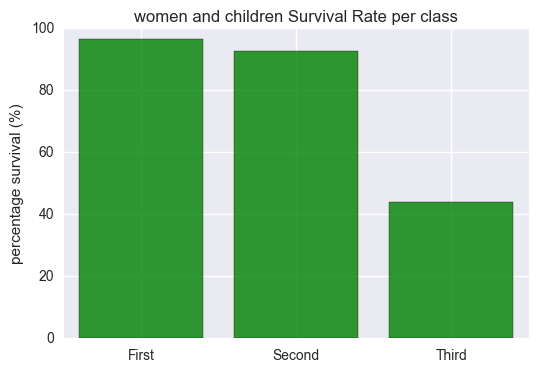

In [15]:
titanicAge_by_category_class_sum=titanic_data_full_Age.groupby(['isWomanOrChild','Pclass'], as_index=False).sum()
titanicAge_by_category_class_count=titanic_data_full_Age.groupby(['isWomanOrChild','Pclass'], as_index=False).count()

#male survival rate by class
xval=titanicAge_by_category_class_count[titanicAge_by_category_class_count['isWomanOrChild']==False]['Pclass']
yval=100*titanicAge_by_category_class_sum[titanicAge_by_category_class_sum['isWomanOrChild']==False]['Survived']\
/titanicAge_by_category_class_count[titanicAge_by_category_class_count['isWomanOrChild']==False]['Survived']
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='red')
plt.xticks(xval, lables)
plt.title("men survival Rate per class")
plt.ylabel("percentage survival (%)")
plt.show()

#female survival rate by class
xval=titanicAge_by_category_class_count[titanicAge_by_category_class_count['isWomanOrChild']==True]['Pclass']
yval=100*titanicAge_by_category_class_sum[titanicAge_by_category_class_sum['isWomanOrChild']==True]['Survived']\
/titanicAge_by_category_class_count[titanicAge_by_category_class_count['isWomanOrChild']==True]['Survived']
lables=["First","Second", "Third"]
lables=["First","Second", "Third"]
plt.bar(xval-0.4, yval, alpha=0.8, color='green')
plt.xticks(xval, lables)
plt.title("women and children Survival Rate per class")
plt.ylabel("percentage survival (%)")
plt.show()


***Even*** after accounting for children, first class men were given more chance to survive relative to second and third class men, this leaves a question mark on how the crew handled the situation, after embarking as much women and children as they could.

now back to another question, were first class male pessengers given higher chance to survive relative to women and children of third class?

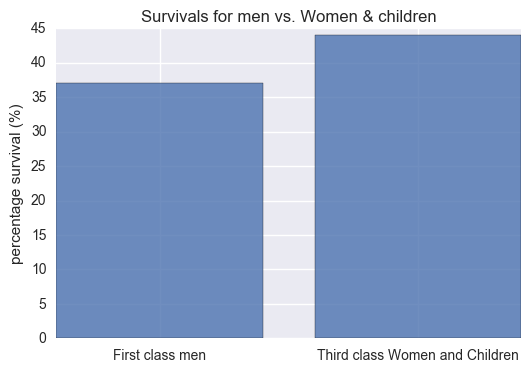

In [16]:
#bar plots for women and children of third class vs men of first class
titanicAge_by_category_class_sum=titanic_data_full_Age.groupby(['isWomanOrChild','Pclass'], as_index=False).sum()
titanicAge_by_category_class_count=titanic_data_full_Age.groupby(['isWomanOrChild','Pclass'], as_index=False).count()

third_class_women_children_survival_rate=(100*titanicAge_by_category_class_sum.iloc[5,2]\
                                          /titanicAge_by_category_class_count.iloc[5,2])

first_class_men_survival_rate=(100*titanicAge_by_category_class_sum.iloc[0,2]\
                                          /titanicAge_by_category_class_count.iloc[0,2])
xval=np.array([0,1])
yval=np.array([first_class_men_survival_rate,third_class_women_children_survival_rate])
lables=["First class men","Third class Women and Children"]
plt.bar(xval-0.4, yval, alpha=0.8)
plt.xticks(xval, lables)
plt.ylabel("percentage survival (%)")
plt.title("Survivals for men vs. Women & children")
plt.show()

***It seems*** third class women and children were given slightly higher chance of survival compared to first class men. it is however not that different. If we compare this ratio with survival rate for women and chidlren in general the ratio is quite low.

Now for the last question, let's see if fare had any impact on survival rate:

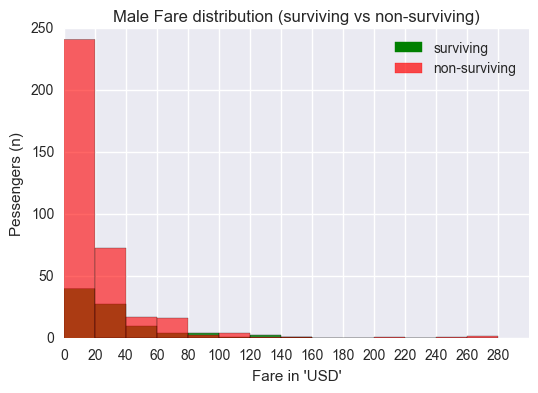

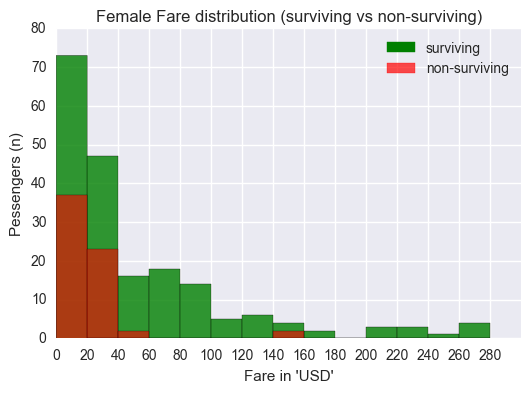

In [17]:
# Survival vs fare
# Let's represent it by Histogram for males and females separately.. we will start by males
# let's also normalize it by the count of males for each bins
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color='green'),Rectangle((0,0),1,1,color='red', alpha=0.7)]
legend_labels=['surviving','non-surviving']
bin_values = [n*20 for n in range(15)]

#male distribution
surviving_males_Fare=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==0) & (titanic_data_full_Age['Survived']==1)]['Fare']
non_surviving_males_Fare=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==0) & (titanic_data_full_Age['Survived']==0)]['Fare']
plt.hist(surviving_males_Fare, alpha=0.8,color='green',bins=bin_values)
plt.hist(non_surviving_males_Fare, alpha=0.6, color='red',bins=bin_values)
plt.xticks(bin_values)
plt.xlabel("Fare in 'USD'")
plt.ylabel("Pessengers (n)")
plt.title("Male Fare distribution (surviving vs non-surviving)")
plt.legend(handles, legend_labels,loc='upper right')
plt.show()

#female distribution
surviving_female_Fare=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==1) & (titanic_data_full_Age['Survived']==1)]['Fare']
non_surviving_female_Fare=titanic_data_full_Age[(titanic_data_full_Age['Sex_numeric']==1) &(titanic_data_full_Age['Survived']==0)]['Fare']
plt.hist(surviving_female_Fare, alpha=0.8,color='green',bins=bin_values)
plt.hist(non_surviving_female_Fare, alpha=0.6, color='red',bins=bin_values)
plt.xticks(bin_values)
plt.legend(handles, legend_labels,loc='upper right')
plt.title("Female Fare distribution (surviving vs non-surviving)")
plt.xlabel("Fare in 'USD'")
plt.ylabel("Pessengers (n)")
plt.show()

the ditribution doesn't look to be much differnet for surving and non surviving pessengers. It's not clear if there is a difference in fare for surviving and non-surviving pessengers. We will need to do statistical test to have more inference.

### Let's test the data for significance

we have already visualized the data to draw an initial idea about it, but we need to draw a conclusion. For this we will do some statstical analysis addressing each question we asked earlier

for the first three questions, we will use a non-parameteric test (Chi-square test for independence of variables) since the variables of interest are all categorical. The null hypothesis will be that the set of two variables (survival versus other variable) are actually independent

for the last question regarding the fare, we will use a t-test for two independent samples (the two samples are the surviving and non-surviving sample).

Let's start with the first three questions:

In [22]:
#create a function for Chi-squared testing for independence of variables
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html
#https://newton.cx/~peter/2014/05/scipy-stats-cheat-sheet/
def chi_square_test(dataframe, variable1, variable2, alpha):
    """I defined this function since we will do three chi-square tests, so it is easier to do one function. some lines in the
    functions were inspired by Hamelg blog (life is a post) link in the comments above. 
    the function takes dataframe, two variables, and alpha values as an input, and returns the chis square test statistics:
    Chi-squared, chi-squared critical for the input alpha value, the p value"""

# calculating the frequency table given the inputs

    dataframe_count=dataframe.groupby([variable1,variable2],as_index=False).count()
    pivot=dataframe_count.pivot(index=variable1,columns=variable2, values='Name')
    row_sum=pivot.sum()
    col_sum=pivot.apply(sum,axis=1)

    # calculating expected values
    expected_value=[]
    expected_value_df=pd.DataFrame([])
    for row_val in row_sum:
        expected_value=[]
        for col_val in col_sum:
            expected_value.append(float(row_val)*col_val/row_sum.sum())
        expected_value_df[row_val]=expected_value
        
    #chi square calculation
    expected_value_df.columns=pivot.columns
    expected_value_df.index=pivot.index
    chisquare_matrix=((pivot-expected_value_df)**2)/expected_value_df
    chisquare=chisquare_matrix.values.sum()

    # the following lines will do the hypothesis testing for alpha=0.05
    chi_crit=stats.chi2.ppf(q=1-alpha, df=(len(row_sum)-1)*(len(col_sum)-1))
    p_value = (1-stats.chi2.cdf(x=chisquare, df=(len(row_sum)-1)*(len(col_sum)-1)))
    
    # communicating the results
    if chisquare > chi_crit:
        result='statistically significant'
        Null_hyp='reject'
        dependence='dependent'
    else:
        result='not statistically significant'
        Null_hyp='Fail to reject'
        dependence='independent'
    if p_value==0.0:
        P_val_str = '< .00001'
    else:
        P_val_str = '= '+str(p_value)

    print "-------------------------------------------------------------------------------------------"
    print str(variable1) +", "+ str(variable2)+":"
    print 'The chi-square statistic is = '+str(chisquare)+', The critical chi-square = '+str(chi_crit)+' at alpha = '+str(alpha)\
    +'. The p-value is '+P_val_str+"."
    print 'The result is '+ result+ ' at alpha ='+str(alpha)+" , and we "+Null_hyp+\
    " the null hypothesis. There is enough evidence to say that the two variables of interest("+str(variable1) \
    +", "+ str(variable2)+ ") are "+ dependence +" at this alpha level."
    print "-------------------------------------------------------------------------------------------"
    print \

# calling the function
chi_square_test(titanic_data_full_Age,'Survived','isWomanOrChild',0.01)
chi_square_test(titanic_data_full_Age,'Survived','Pclass',0.01)

-------------------------------------------------------------------------------------------
Survived, isWomanOrChild:
The chi-square statistic is = 224.511462164, The critical chi-square = 6.63489660102 at alpha = 0.01. The p-value is < .00001.
The result is statistically significant at alpha =0.01 , and we reject the null hypothesis. There is enough evidence to say that the two variables of interest(Survived, isWomanOrChild) are dependent at this alpha level.
-------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------
Survived, Pclass:
The chi-square statistic is = 92.9014172114, The critical chi-square = 9.21034037198 at alpha = 0.01. The p-value is < .00001.
The result is statistically significant at alpha =0.01 , and we reject the null hypothesis. There is enough evidence to say that the two variables of interest(Survived, Pclass) are dependent at this alpha 

***We can see*** that the statistical tests are inline with our initial observation. indeed, both being woman or child, and the class are factors affecting the survival rate.

Now, for the third question. In the below results, isWomanOrChild represents 3rd class women and children if True, and if False it represents 1st class men. 

If the survival is independent on this variable, this means that the crew did not tend to give priority to third class women and children over first class men. Or as mentioned before, there might actually be a lurking variable (like time of arrival of pessengers to boats, or whether the pessengers arrived to the boat at all), which is not available for data in hand.

In [23]:
# to run Chi-square test for the third question (1st class men vs 3rd class women and children survival), we will first need 
# to create a new dataframe containing only this categories, then apply chi-square test
titanic_data_category=\
titanic_data_full_Age[((titanic_data_full_Age['isWomanOrChild']==True) & (titanic_data_full_Age['Pclass']==3))\
                                            |((titanic_data_full_Age['isWomanOrChild']==False) & (titanic_data_full_Age['Pclass']==1))]

chi_square_test(titanic_data_category,'Survived','isWomanOrChild',0.05)

-------------------------------------------------------------------------------------------
Survived, isWomanOrChild:
The chi-square statistic is = 0.916747740267, The critical chi-square = 3.84145882069 at alpha = 0.05. The p-value is = 0.338330360947.
The result is not statistically significant at alpha =0.05 , and we Fail to reject the null hypothesis. There is enough evidence to say that the two variables of interest(Survived, isWomanOrChild) are independent at this alpha level.
-------------------------------------------------------------------------------------------



***Indeed*** the survival rate seems to be independent on whether the pessengers were first class men, or third class women and children. but we can't say for sure that the crew did not prioritize third class women and children over first class men. for this we will need data for time of arrival of pessengers to boats, or whether the pessengers arrived to the boat.

***Now***, let's do the testing for the last question
Is there any relation between pessenger fare and the survival rate.. in other words, is the fare mean/distribution different for surviving and non-surviving pessengers?

for this we will do two independent samples t-test, and check the mean difference

we will ignore the normality assumption since the sample size is quite larger than 30

In [20]:
surviving_Fair=titanic_data[titanic_data['Survived']==1]['Fare']
non_surviving_Fair=titanic_data[titanic_data['Survived']==0]['Fare']

print "-------------------------------------------------------------------------------------------"
print "t-statistics for all pessengers: " + str(stats.ttest_ind(a=surviving_Fair,b=non_surviving_Fair))
print "t-statistics for male pessengers: "+ str (stats.ttest_ind(a=surviving_males_Fare,b=non_surviving_males_Fare))
print "t-statistics for female pessengers: "+ str (stats.ttest_ind(a=surviving_female_Fare,b=non_surviving_female_Fare))
print "-------------------------------------------------------------------------------------------"
print \


-------------------------------------------------------------------------------------------
t-statistics for all pessengers: Ttest_indResult(statistic=7.9391916608710549, pvalue=6.1201893419241981e-15)
t-statistics for male pessengers: Ttest_indResult(statistic=3.9625008542292779, pvalue=8.6199069488822851e-05)
t-statistics for female pessengers: Ttest_indResult(statistic=3.8202697159325174, pvalue=0.00016693843303474561)
-------------------------------------------------------------------------------------------



***It seems*** that the distribution of fair is significantly different for surviving and non surviving pessengers, and the significance is more obvious in case of male pessengers (p value is much lower).. this was expected somehow for male pessengers but not for females. 

Again there might be a lurking variable (which is probably the pessenger class), since lower pessenger class tends to be cheaper. And again, the fact that the third class pessengers were further away from the boats may be another factor.
